# 最速降下線問題

## 問題設定
水平方向を$x$軸, 鉛直下方を$y$軸とする直交座標系を考える. 

原点から自由落下して$(x_f,y_f)$に, $y=y(x)$という道上を重力のみを受けて通れるようにした場合に, 最速で到達するようにしたい.

## 問題の定式化

重力加速度$g>0$, 質点の質量を$m>0$とすると, 速度$v$はエネルギー保存則より
$$
\dfrac{1}{2}mv^2 -mgy=0
$$
から質点の高さ$y$に依存し, $v(y)=\sqrt{2gy}$と表せる.

したがって, 質点が$(x,y(x))$にあるとき, 質点の$x$方向の速度は

$$
\dfrac{v(g(y))}{\sqrt{1+y'(x)^2}} = \sqrt{\dfrac{2gy}{1+y'(x)^2}}.
$$

したがって, 評価関数

$$
J(y) = \int_0^{x_f} \sqrt{\dfrac{1+y'(x)^2}{2gy}}\,dx
$$

が$x=x_f$に到達するまでにかかる時間である.

## オイラーの方程式
$$
L(y,q) = \sqrt{\dfrac{1+q^2}{2gy}}
$$

としたときの時間 $t$ に依存しないコスト関数に対するオイラーの方程式は

$$
\dfrac{\partial L }{\partial q}(y(x),y'(x))y'(x) -L(y(x),y'(x))=c_1
$$

がある実数$c$について成り立つことである. 整理すると, 実数を取り替えて

$$
y(x)(1+y'(x)^2)=c
$$

がある実数$c$について成り立つことと言い換えられる. 

ここで, $y(\theta)=\dfrac{c}{2}(1-\cos\theta)$と置いてみると, $\frac{d y}{d\theta}=c\sin{\frac{\theta}{2}}\cos{\frac{\theta}{2}}$であり, 微分方程式から

$$\begin{aligned}
\frac{d y}{d x}
&= \sqrt{\dfrac{c-y}{y}}\\
&= \sqrt{\dfrac{1+\cos\theta}{1-\cos\theta}}\\
&= \dfrac{1}{\tan{\frac{\theta}{2}}}
\end{aligned}$$

を得る. 媒介変数の微分により

$$\begin{aligned}
\dfrac{dx}{d\theta}
&= c \sin^2\frac{\theta}{2}\\
&= \dfrac{c}{2}(1-\cos\theta)
\end{aligned}$$

を得る. 積分して, $x(\theta)=\dfrac{c}{2}(\theta-\sin\theta)$ を得る.

あとはパラメータ$c$を終点を通るように選べばよい

## 数値解

ある$\theta_1\in(\pi, 2\pi)$であって$(x(\theta_1), y(\theta_1))=(x_f, y_f)$を満たすような$c>0$を見つければ良い(もしこの範囲で見つからなかったら, $\theta_1\in(0, \pi)$で改めて探す)

$c$は区間

$$
\left(\dfrac{x_f}{\pi}, \dfrac{2x_f}{\pi}\right)
$$

にあるので, 二分探索により求めていく

以下の例では$(x_f, y_f) = (4,1)$として求めていく

In [1]:
x_f, y_f = 4, 1

In [2]:
import numpy as np
from scipy.optimize import fsolve


def sol_to_xf(param):
    return fsolve(lambda x: param / 2 * (x - np.sin(x)) - x_f, 1.0)[0]


def theta_to_y(theta, param):
    return param / 2 * (1 - np.cos(theta))


def param_is_too_big(param):
    theta = sol_to_xf(param)
    y = theta_to_y(theta, param)
    return y > y_f

In [3]:
eps = 1e-10

left = x_f / np.pi
right = 2 * x_f / np.pi

if not param_is_too_big(right):
    left = 2 * x_f / np.pi
    right = 1e10

mid = (left + right) / 2
while right - left > eps:
    if param_is_too_big(mid):
        right = mid
    else:
        left = mid
    mid = (left + right) / 2

const = mid

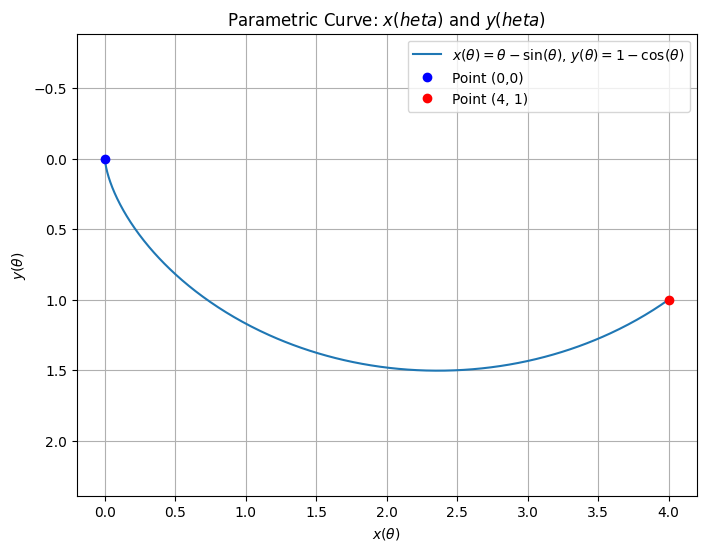

In [4]:
import matplotlib.pyplot as plt

theta_1 = sol_to_xf(const)
theta = np.linspace(0, theta_1, 500)

# x(θ) と y(θ) の定義
x = const / 2 * (theta - np.sin(theta))
y = const / 2 * (1 - np.cos(theta))

# プロット
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r"$x(\theta) = \theta - \sin(\theta)$, $y(\theta) = 1 - \cos(\theta)$")

plt.plot(0, 0, "bo", label="Point (0,0)")
plt.plot(x_f, y_f, "ro", label=f"Point ({x_f}, {y_f})")
# 軸ラベル
plt.xlabel(r"$x(\theta)$")
plt.ylabel(r"$y(\theta)$")
# 軸のスケールを同じに設定
plt.axis("equal")

# y軸を逆転
plt.gca().invert_yaxis()
# グリッドを追加
plt.grid(True)

# グラフのタイトルと凡例を設定
plt.title("Parametric Curve: $x(\theta)$ and $y(\theta)$")
plt.legend()

# グラフを表示
plt.show()

### 定数を変える

In [5]:
x_f, y_f = 2, 10

In [6]:
left = x_f / np.pi
right = 2 * x_f / np.pi

if not param_is_too_big(right):
    left = 2 * x_f / np.pi
    right = 1e10

mid = (left + right) / 2
while right - left > eps:
    if param_is_too_big(mid):
        right = mid
    else:
        left = mid
    mid = (left + right) / 2

const = mid

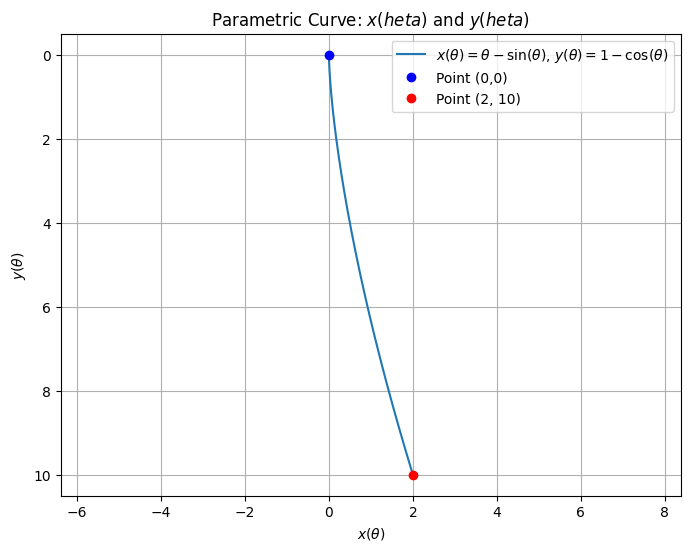

In [7]:
theta_1 = sol_to_xf(const)
theta = np.linspace(0, theta_1, 500)

# x(θ) と y(θ) の定義
x = const / 2 * (theta - np.sin(theta))
y = const / 2 * (1 - np.cos(theta))

# プロット
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r"$x(\theta) = \theta - \sin(\theta)$, $y(\theta) = 1 - \cos(\theta)$")

plt.plot(0, 0, "bo", label="Point (0,0)")
plt.plot(x_f, y_f, "ro", label=f"Point ({x_f}, {y_f})")
# 軸ラベル
plt.xlabel(r"$x(\theta)$")
plt.ylabel(r"$y(\theta)$")
# 軸のスケールを同じに設定
plt.axis("equal")

# y軸を逆転
plt.gca().invert_yaxis()
# グリッドを追加
plt.grid(True)

# グラフのタイトルと凡例を設定
plt.title("Parametric Curve: $x(\theta)$ and $y(\theta)$")
plt.legend()

# グラフを表示
plt.show()